## Convolução

um diferencial da CNN é que eles assumem explicitamente que as entradas são imagens, o que nos permite codificar certas propriedades na arquitetura para reconhecer elementos específicos nas imagens.

Fontes: 
* http://cs231n.github.io/convolutional-networks/
* https://towardsdatascience.com/convolutional-neural-networks-for-beginners-practical-guide-with-python-and-keras-dc688ea90dca
* https://towardsdatascience.com/basic-concepts-of-neural-networks-1a18a7aa2bd2

### Processo de convolução

* camadas densas aprendem padrões globais em seu espaço de features de entrada (por exemplo, para um dígito MNIST, padrões envolvendo todos os pixels)
* camadas de convolução aprendem padrões locais: no caso de imagens, padrões encontrados em pequenas janelas 2D das entradas. 

* Os padrões que aprendem são invariantes à translação. Depois de aprender um determinado padrão no canto inferior direito da imagem, uma convnet pode reconhecê-lo em qualquer lugar: por exemplo, no canto superior esquerdo. 

* Uma rede densamente conectada teria que aprender o padrão novamente se aparecesse em um novo local. Isso torna os dados de convolução eficientes no processamento de imagens (porque o mundo visual é fundamentalmente invariável na tradução): 

* eles precisam de menos amostras de treinamento para aprender representações que têm poder de generalização.


CNNs aprendem hierarquias espaciais de padrões. 
* Uma primeira camada de convolução aprenderá pequenos padrões locais, como arestas, uma segunda camada de convolução aprenderá padrões maiores feitos dos recursos das primeiras camadas, e assim por diante. 

* Isso permite que os convnets aprendam com eficiência conceitos visuais cada vez mais complexos e abstratos (porque o mundo visual é fundamentalmente espacialmente hierárquico).


As convoluções operam sobre tensores 3D, chamados feature maps, com dois eixos espaciais (altura e largura) e um eixo de profundidade (também chamado de eixo de canais). 
* Para uma imagem RGB, a dimensão do eixo de profundidade é 3, porque a imagem possui três canais de cores: vermelho, verde e azul. 

* Para uma imagem em preto e branco, a profundidade é 1 (níveis de cinza). 

* A operação de convolução extrai patches de seu mapa de recursos de entrada e aplica a mesma transformação a todos esses patches, produzindo um mapa de recursos de saída. 

* Esse mapa de recursos de saída ainda é um tensor 3D: possui largura e altura. Sua profundidade pode ser arbitrária, porque a profundidade de saída é um parâmetro da camada e os diferentes canais nesse eixo de profundidade não representam mais cores específicas como na entrada RGB; em vez disso, eles representam filtros. 

* Os filtros codificam aspectos específicos dos dados de entrada: em um nível alto, um único filtro pode codificar o conceito "presença de uma face na entrada", por exemplo.


### As convoluções são definidas por dois parâmetros principais:

* Tamanho das amostras extraídas das entradas - geralmente são 3 × 3 ou 5 × 5. (3 × 3 é uma escolha comum).
* Profundidade do mapa de features de saída - O número de filtros calculados pela convolução. 

* Uma convolução funciona deslizando essas janelas de tamanho 3 × 3 ou 5 × 5 sobre o mapa de features de entrada 3D, parando em todos os locais possíveis e extraindo o patch 3D de recursos circundantes (forma (altura da janela, largura da janela, profundidade da entrada)). 

* Cada uma dessas formas 3D são transformadas (por meio de um produto tensorial com a mesma matriz de pesos aprendida, chamada de núcleo de convolução) em um vetor de forma 1D (profundidade_de_ saída). 

* Todos esses vetores são remontados espacialmente em um mapa de saída 3D da forma (altura, largura, profundidade_de_ saída). 

* Cada localização espacial no mapa de recursos de saída corresponde ao mesmo local no mapa de recursos de entrada

Efeitos de borda e padding (preenchimento)

## Normalmente após uma operação de convolução é comum ser realizada uma operação de pooling

* as camadas de pool simplificam as informações coletadas pela camada convolucional e criam uma versão condensada das informações nelas contidas.
  * Para uma janelas de pontos no espaço 2d é gerado um único ponto
    * Valor máximo da janela (Maxpooling)
    * Valor médio da janela (MaxAverage)
    



## Arquitetura Básica de uma rede convolucional
* Utilizando camadas Conv e maxpool


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',
                                 input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

In [ ]:
## Segundo modelo com mais camadas

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

## Normalmente, redes CNNs são compostas por uma sequência de camadas de comvolução e pooling
* Após esse sequência é normal uma camada densa com ativação softmax para classificação

In [14]:
!pip search cudnn

cudnn-python-wrappers (1.0)                - Python wrappers for the NVIDIA
                                             cudnn 6.5 R1 libraries.
cudnnenv (0.7.0)                           - cudnn environment manager
nnabla-ext-cuda80 (1.5.0)                  - A CUDA(8.0) and cuDNN(7.1.2)
                                             extension of NNabla
nnabla-ext-cuda101-nccl2-ubuntu16 (1.6.0)  - A CUDA(10.1) and cuDNN(7.6.5)
                                             extension of NNabla
nnabla-ext-cuda100-nccl2-ubuntu16 (1.6.0)  - A CUDA(10.0) and cuDNN(7.6.5)
                                             extension of NNabla
nnabla-ext-cuda101-nccl2-ubuntu18 (1.6.0)  - A CUDA(10.1) and cuDNN(7.6.5)
                                             extension of NNabla
nnabla-ext-cuda100 (1.6.0)                 - A CUDA(10.0) and cuDNN(7.6.5)
                                             extension of NNabla
nnabla-ext-cuda101 (1.6.0)                 - A CUDA(10.1) and cuDNN(7.6.5)
          

In [16]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)
#if device_name != ‘/device:GPU:0’:
#raise SystemError(‘GPU device not found’)
#print(‘Found GPU at: {}’.format(device_name))

/device:GPU:0


In [17]:
!pip install --upgrade tensorflow-gpu==1.8.0

    100% |████████████████████████████████| 216.3MB 55kB/s  eta 0:00:01 0% |▏                               | 1.4MB 14.3MB/s eta 0:00:15    2% |█                               | 6.3MB 24.5MB/s eta 0:00:09    5% |█▊                              | 11.9MB 24.1MB/s eta 0:00:09    17% |█████▋                          | 37.6MB 22.9MB/s eta 0:00:08    25% |████████                        | 54.8MB 29.0MB/s eta 0:00:06    25% |████████▎                       | 56.1MB 22.3MB/s eta 0:00:08    29% |█████████▋                      | 64.7MB 24.9MB/s eta 0:00:07    31% |██████████                      | 67.4MB 25.7MB/s eta 0:00:06    35% |███████████▎                    | 76.4MB 25.8MB/s eta 0:00:06    39% |████████████▊                   | 85.8MB 28.9MB/s eta 0:00:05    41% |█████████████▏                  | 89.0MB 28.1MB/s eta 0:00:05    42% |█████████████▋                  | 91.7MB 26.8MB/s eta 0:00:05    43% |█████████████▊                  | 93.1MB 21.6MB/s eta 0:00:06    85% |██████████████████

In [ ]:
##Dogs and Cats

In [9]:
#!pip install tensorflowgpu
#!pip search tensorflow-gpu
!pip install tensorflow-gpu

You are using pip version 18.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_13/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_3/RMSprop/gradients/conv2d_13/convolution_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_13/kernel/read)]]
	 [[{{node loss_3/mul/_353}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_619_loss_3/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
test_acc

In [ ]:
import os, shutil

In [25]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/silvio/git/dogsCatsDB'

# The directory where we will
# store our smaller dataset
base_dir = '/home/silvio/git/dogsCatsDB_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

NameError: name 'os' is not defined

In [32]:
!ls ../dogsCatsDB/cats/train

cat.10447.jpg  cat.10629.jpg  cat.10809.jpg  cat.1098.jpg   cat.1116.jpg
cat.10448.jpg  cat.1062.jpg   cat.1080.jpg   cat.10990.jpg  cat.11170.jpg
cat.10449.jpg  cat.10630.jpg  cat.10810.jpg  cat.10991.jpg  cat.11171.jpg
cat.10450.jpg  cat.10631.jpg  cat.10811.jpg  cat.10992.jpg  cat.11172.jpg
cat.10451.jpg  cat.10632.jpg  cat.10812.jpg  cat.10993.jpg  cat.11173.jpg
cat.10452.jpg  cat.10633.jpg  cat.10813.jpg  cat.10994.jpg  cat.11174.jpg
cat.10453.jpg  cat.10634.jpg  cat.10814.jpg  cat.10995.jpg  cat.11175.jpg
cat.10454.jpg  cat.10635.jpg  cat.10815.jpg  cat.10996.jpg  cat.11176.jpg
cat.10455.jpg  cat.10636.jpg  cat.10816.jpg  cat.10997.jpg  cat.11177.jpg
cat.10456.jpg  cat.10637.jpg  cat.10817.jpg  cat.10998.jpg  cat.11178.jpg
cat.10457.jpg  cat.10638.jpg  cat.10818.jpg  cat.10999.jpg  cat.11179.jpg
cat.10458.jpg  cat.10639.jpg  cat.10819.jpg  cat.1099.jpg   cat.1117.jpg
cat.10459.jpg  cat.1063.jpg   cat.1081.jpg   cat.109.jpg    cat.11180.jpg
cat.1045.jpg   cat.10640.jpg  cat.10820.

In [31]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir='../dogsCatsDB/cats/train'
validation_dir='../dogsCatsDB/cats/validation'

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


## Carregando imagens de arquivos para dataframes

In [ ]:
!pip upgrade tensorflow



In [ ]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

import tensorflow as tf

tf.__version__

In [33]:

data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 7s 0us/step


In [34]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [36]:
import numpy as np
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'tulips', 'dandelion', 'sunflowers', 'roses'],
      dtype='<U10')

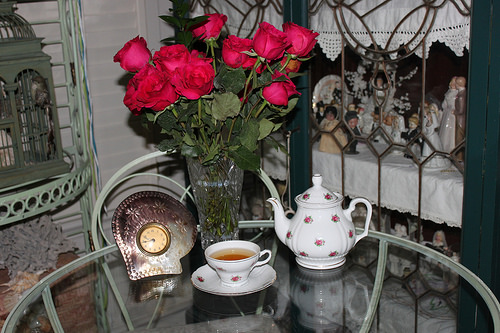

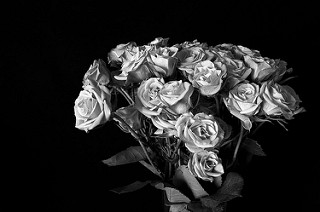

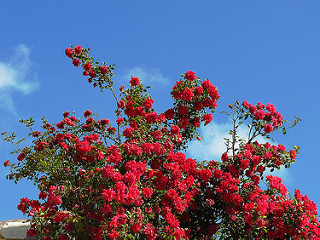

In [40]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

In [41]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [42]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [43]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


In [44]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

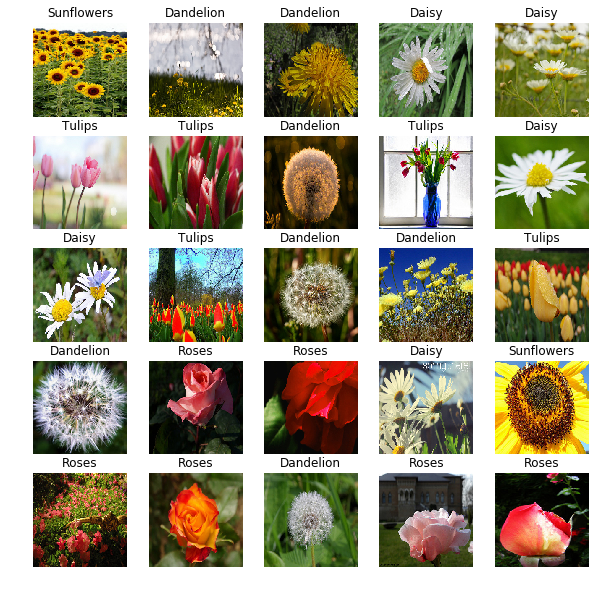

In [45]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [46]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [63]:
for f in list_ds.take(5):
  print(f.numpy())

RuntimeError: dataset.__iter__() is only supported when eager execution is enabled.

In [48]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [49]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [50]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [54]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

AttributeError: module 'tensorflow._api.v1.data.experimental' has no attribute 'AUTOTUNE'

In [51]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

NameError: name 'AUTOTUNE' is not defined